In [1]:
import os
import xml.etree.ElementTree as ET
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
data_dir = "./data/CND2024"
log_files = os.listdir(data_dir)

data_dir_ncnd = "./data/NCND2024"
log_files_ncnd = os.listdir(data_dir_ncnd)


In [7]:
for log_file in log_files:
    print(log_file)

CN003G5RFCP009CI00APA01
CN04JN2KFCP0004A00C0A14
CN0DY2X0FCP0007E022FA02
CN0PJ80MFCP0024E012RA07
CN0XP8V5FCP009AU00SQA15
CN0Y2G81FCP002610011A03
CN0DY2X0FCP0026F00KYA06
CN0Y2G81FCP0026901IUA00
CN0P2RNTFCP001770099A01
CN0DY2X0FCP0026P02V8A06


In [4]:
type(log_files)

list

In [8]:
tree = ET.parse(os.path.join(data_dir, log_files[0]))

In [9]:
root = tree.getroot()

In [10]:
root

<Element 'LCLogEvents' at 0x7f74f12f7650>

In [17]:
len(root.findall(".//Event"))

323

In [18]:
events = root.findall(".//Event")


In [135]:
log_data = {
    "AgentID": [],
    # "Sequence": [],
    # "Timestamp": [],
    "Severity": [],
    "Category": [],
    "MessageID": [],
    # "Message": [],
    # "FQDD": []
    "CND": []
}

for log_file in log_files:
    tree = ET.parse(os.path.join(data_dir, log_file))
    root = tree.getroot()
    events = root.findall(".//Event")

    for event in events:
    
        
        agent_id = event.get('AgentID')
        category = event.get('Category')
        severity = event.get('Severity')
        # timestamp = event.get('Timestamp')
        # sequence = event.get('Sequence')
        # message = event.find('Message').text
        message_id = event.find('MessageID').text
    
        # fqdd = event.find('FQDD').text if event.find('FQDD') is not None else ''
        # log_data["Sequence"].append(sequence)
        log_data["AgentID"].append(agent_id)
        # log_data["Timestamp"].append(timestamp)
        log_data["Severity"].append(severity)
        log_data["Category"].append(category)
        log_data["MessageID"].append(message_id)
        # log_data["Message"].append(message)
        log_data["CND"].append(1)
for log_file in log_files_ncnd:
    tree = ET.parse(os.path.join(data_dir_ncnd, log_file))
    root = tree.getroot()
    events = root.findall(".//Event")

    for event in events:
    
        
        agent_id = event.get('AgentID')
        category = event.get('Category')
        severity = event.get('Severity')
        # timestamp = event.get('Timestamp')
        # sequence = event.get('Sequence')
        # message = event.find('Message').text
        message_id = event.find('MessageID').text
    
        # fqdd = event.find('FQDD').text if event.find('FQDD') is not None else ''
        # log_data["Sequence"].append(sequence)
        log_data["AgentID"].append(agent_id)
        # log_data["Timestamp"].append(timestamp)
        log_data["Severity"].append(severity)
        log_data["Category"].append(category)
        log_data["MessageID"].append(message_id)
        # log_data["Message"].append(message)
        log_data["CND"].append(0)

In [162]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
# Example usage:
# Create a contingency table (replace this with your own data)
contingency_table = np.array([[10, 20, 30],
                              [15, 25, 35],
                              [5, 10, 15]])

# Calculate Cramer's V
cramer_v = cramers_v(contingency_table)
print("Cramer's V:", cramer_v)

Cramer's V: 0.0


In [136]:
import pandas as pd 

df = pd.DataFrame.from_dict(log_data) 

df 


,AgentID,Severity,Category,MessageID,CND
0,iDRAC,Informational,Audit,PWR8507,1
1,iDRAC,Informational,System Health,PSU0800,1
2,iDRAC,Informational,System Health,PSU0800,1
3,DM,Informational,Configuration,PR7,1
4,DM,Informational,Configuration,PR7,1
...,...,...,...,...,...
26910,iDRAC,Informational,Audit,SRV010,0
26911,iDRAC,Informational,Audit,SRV014,0
26912,iDRAC,Informational,Audit,SRV014,0
26913,iDRAC,Warning,System Health,SRV013,0


In [150]:
confusion_matrix = pd.crosstab(df["CND"], df["MessageID"])

In [151]:
confusion_matrix

MessageID,ASR0000,BAT0017,BAT0021,BAT1009,CERT331,CPU0000,CPU0001,CPU0704,CPU9000,CPUA0023,...,VDR8,VDR93,VLT0204,VLT0205,VLT0223,VLT0304,VLT0305,VME0001,VME0005,VME0007
CND,,,,,,,,,,,,,,,,,,,,,
0,0,3,3,1,13,310,1,11,485,19,...,2,2,102,72,1,46,17,3,3,3
1,3,1,2,0,0,8,0,0,3,15,...,0,0,4,1,0,0,0,0,0,0


# MessageID has moderate to strong association with CND

In [163]:
cramers_v(pd.crosstab(df["CND"], df["MessageID"]))

0.635994573738188

In [172]:
cramers_v(pd.crosstab(df["AgentID"], df["MessageID"]))

0.9813256372113459

In [173]:
pd.crosstab(df["AgentID"], df["MessageID"])

MessageID,ASR0000,BAT0017,BAT0021,BAT1009,CERT331,CPU0000,CPU0001,CPU0704,CPU9000,CPUA0023,...,VDR8,VDR93,VLT0204,VLT0205,VLT0223,VLT0304,VLT0305,VME0001,VME0005,VME0007
AgentID,,,,,,,,,,,,,,,,,,,,,
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AutoDiscovery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DM,0,0,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ISM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RACADM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RACLOG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,3
SEL,3,4,5,0,0,0,1,11,488,34,...,0,0,106,73,1,46,17,0,0,0
UEFI SS/USC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WSMAN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
cramers_v(pd.crosstab(df["Severity"], df["MessageID"]))

0.9946348346107556

In [174]:
cramers_v(pd.crosstab(df["Category"], df["MessageID"]))

0.9946717954563347

In [169]:
pd.crosstab(df["AgentID"], df["Category"], margins=True)

Category,Audit,Configuration,Storage,System Health,Updates,All
AgentID,,,,,,
6,0,0,0,2,0,2
AutoDiscovery,0,244,0,0,0,244
DM,5713,360,0,2,12,6087
ISM,234,0,0,0,0,234
RACADM,0,5,0,0,0,5
RACLOG,3137,204,0,0,42,3383
SEL,0,0,0,6885,0,6885
UEFI SS/USC,0,15,10,0,40,65
WSMAN,8,0,0,0,0,8


In [170]:
pd.crosstab(df["AgentID"], df["Severity"], margins=True)

Severity,Critical,Informational,Warning,All
AgentID,,,,
6,0,1,1,2
AutoDiscovery,0,244,0,244
DM,14,6071,2,6087
ISM,0,147,87,234
RACADM,0,5,0,5
RACLOG,0,3373,10,3383
SEL,2809,2549,1527,6885
UEFI SS/USC,6,59,0,65
WSMAN,0,8,0,8


In [153]:
pd.crosstab(df["Severity"], df["Category"], margins=True)

Category,Audit,Configuration,Storage,System Health,Updates,All
Severity,,,,,,
Critical,13,6,641,3246,0,3906
Informational,10608,1797,2922,3669,360,19356
Warning,103,365,901,2220,64,3653
All,10724,2168,4464,9135,424,26915


In [171]:
cramers_v(pd.crosstab(df["Severity"], df["Category"]))

0.4157011156263054

In [166]:
cramers_v(pd.crosstab(df["Category"], df["CND"]))

0.27742441335953416

In [148]:
pd.crosstab(df["Category"], df["CND"])

CND,0,1
Category,,
Audit,6187,4537
Configuration,1217,951
Storage,4060,404
System Health,6722,2413
Updates,154,270


In [167]:
cramers_v(pd.crosstab(df["Severity"], df["CND"]))

0.04856305636407249

In [146]:
pd.crosstab(df["Severity"], df["CND"])

CND,0,1
Severity,,
Critical,2624,1282
Informational,13015,6341
Warning,2701,952


In [168]:
cramers_v(pd.crosstab(df["CND"], df["AgentID"]))

0.2576471251068684

In [147]:
pd.crosstab(df["AgentID"], df["CND"])

CND,0,1
AgentID,,
6,0,2
AutoDiscovery,160,84
DM,3067,3020
ISM,56,178
RACADM,5,0
RACLOG,2521,862
SEL,5649,1236
UEFI SS/USC,47,18
WSMAN,4,4


In [141]:
pd.crosstab(df["Severity"], df["Category"]).to_numpy()

array([[   13,     6,   641,  3246,     0],
       [10608,  1797,  2922,  3669,   360],
       [  103,   365,   901,  2220,    64]])

In [142]:
pd.crosstab(df["CND"], df["MessageID"])

MessageID,ASR0000,BAT0017,BAT0021,BAT1009,CERT331,CPU0000,CPU0001,CPU0704,CPU9000,CPUA0023,...,VDR8,VDR93,VLT0204,VLT0205,VLT0223,VLT0304,VLT0305,VME0001,VME0005,VME0007
CND,,,,,,,,,,,,,,,,,,,,,
0,0,3,3,1,13,310,1,11,485,19,...,2,2,102,72,1,46,17,3,3,3
1,3,1,2,0,0,8,0,0,3,15,...,0,0,4,1,0,0,0,0,0,0


In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [143]:
cm = confusion_matrix(
    df["Severity"], # actual true
    df["MessageID"] # prediction
)
print(cm)

TypeError: 'DataFrame' object is not callable

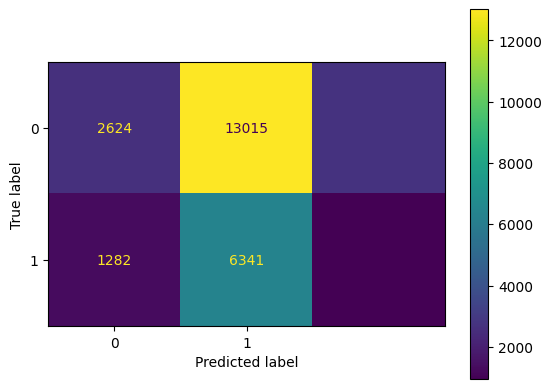

In [145]:
# cm = confusion_matrix(df["Severity"], df["MessageID"])
cm = pd.crosstab(df["CND"], df["Severity"]).to_numpy()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()